In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.cluster import KMeans

In [20]:
df = pd.read_parquet('./new_changes_done.parquet')
df

,fsym_id,fsym_regional_id,fund_id,report_date,is_holding,roe,roa,oper_mgn,pay_out_ratio,pe,pbps,div_yld,stock_id,last_holding,new_changes
0,T1N9J9-S,RPMZQ3-R,04BBSH-E,2020-01-31,0,0.736257,0.528786,0.895426,0.751899,0.332990,0.435537,0.670334,T1N9J9-S-RPMZQ3-R-04BBSH-E,NaN,1.0
152119,T1N9J9-S,RPMZQ3-R,04BBSH-E,2020-02-29,0,0.736257,0.528786,0.895426,0.751899,0.270954,0.389738,0.697859,T1N9J9-S-RPMZQ3-R-04BBSH-E,0.0,0.0
220037,T1N9J9-S,RPMZQ3-R,04BBSH-E,2020-03-31,0,0.736257,0.528786,0.895426,0.751899,0.266500,0.276077,0.776919,T1N9J9-S-RPMZQ3-R-04BBSH-E,0.0,0.0
378157,T1N9J9-S,RPMZQ3-R,04BBSH-E,2020-04-30,0,0.736257,0.528786,0.895426,0.751899,0.367473,0.308728,0.741614,T1N9J9-S-RPMZQ3-R-04BBSH-E,0.0,0.0
513331,T1N9J9-S,RPMZQ3-R,04BBSH-E,2020-05-31,0,0.736257,0.528786,0.895426,0.751899,0.365411,0.306169,0.742367,T1N9J9-S-RPMZQ3-R-04BBSH-E,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770229,Q3MHV7-S,K0SS5D-R,04LWTG-E,2020-08-31,0,0.000000,0.000000,0.098823,0.307280,0.146882,1.000000,0.000000,Q3MHV7-S-K0SS5D-R-04LWTG-E,0.0,0.0
918146,Q3MHV7-S,K0SS5D-R,04LWTG-E,2020-09-30,0,0.000000,0.000000,0.098823,0.307280,0.159834,1.000000,0.797332,Q3MHV7-S-K0SS5D-R-04LWTG-E,0.0,0.0
968469,Q3MHV7-S,K0SS5D-R,04LWTG-E,2020-10-31,0,0.000000,0.000000,0.098823,0.307280,0.119659,1.000000,0.830713,Q3MHV7-S-K0SS5D-R-04LWTG-E,0.0,0.0
1169761,Q3MHV7-S,K0SS5D-R,04LWTG-E,2020-11-30,0,0.000000,0.000000,0.098823,0.307280,0.193244,1.000000,0.780181,Q3MHV7-S-K0SS5D-R-04LWTG-E,0.0,0.0


In [21]:
date_array = df['report_date'].unique()
date_array

array(['2020-01-31T00:00:00.000000000', '2020-02-29T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-30T00:00:00.000000000',
       '2020-05-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000', '2020-08-31T00:00:00.000000000',
       '2020-09-30T00:00:00.000000000', '2020-10-31T00:00:00.000000000',
       '2020-11-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [4]:
def Elbow_curve(date,fund):
    df = pd.read_parquet('./new_changes_done.parquet')    
    df = df.loc[df['report_date']==date]
    df = df.loc[df['fund_id']==fund]
    df = df.iloc[:,5:13]
    df.set_index(['stock_id'],inplace=True)

    #format the data as a numpy array to feed into the K-Means algorithm
    data = np.asarray([np.asarray(df['roe']),np.asarray(df['roa']),np.asarray(df['oper_mgn']),np.asarray(df['pay_out_ratio']),np.asarray(df['pe']),np.asarray(df['pbps']),np.asarray(df['div_yld'])]).T
    X = data
    distorsions = []
    for k in range(2, 30):
        k_means = KMeans(n_clusters=k)
        k_means.fit(X)
        distorsions.append(k_means.inertia_)
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 30), distorsions)
    plt.grid(True)
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.title('Elbow curve')
    plt.show()


Elbow Curve for date:  2020-01-31T00:00:00.000000000


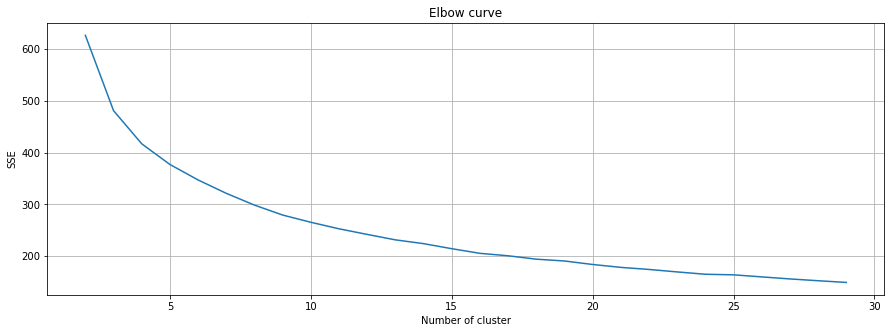

None
Elbow Curve for date:  2020-02-29T00:00:00.000000000


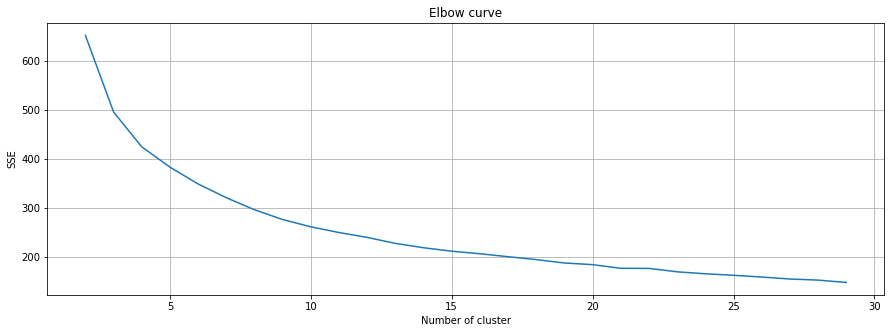

None
Elbow Curve for date:  2020-03-31T00:00:00.000000000


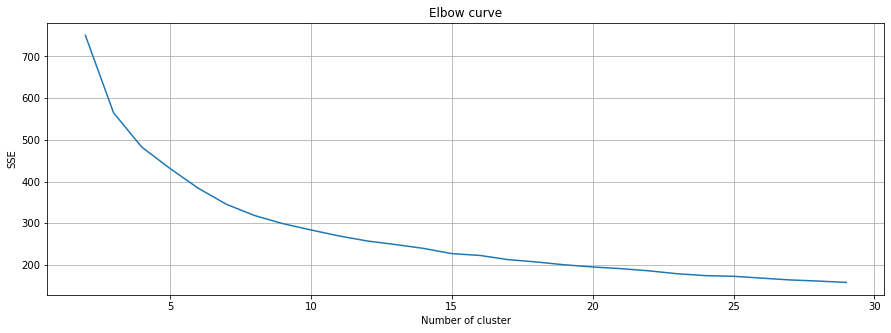

None
Elbow Curve for date:  2020-04-30T00:00:00.000000000


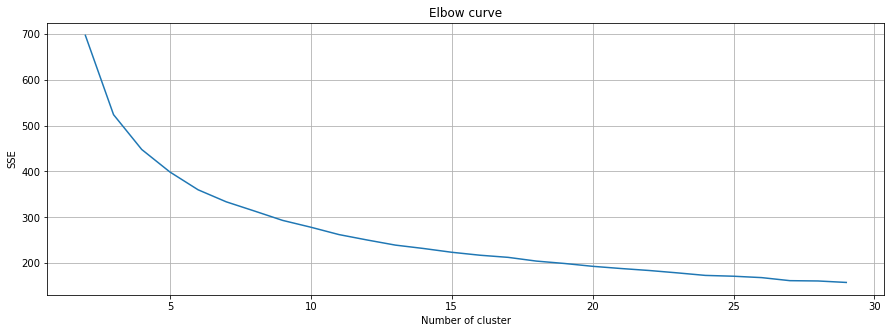

None
Elbow Curve for date:  2020-05-31T00:00:00.000000000


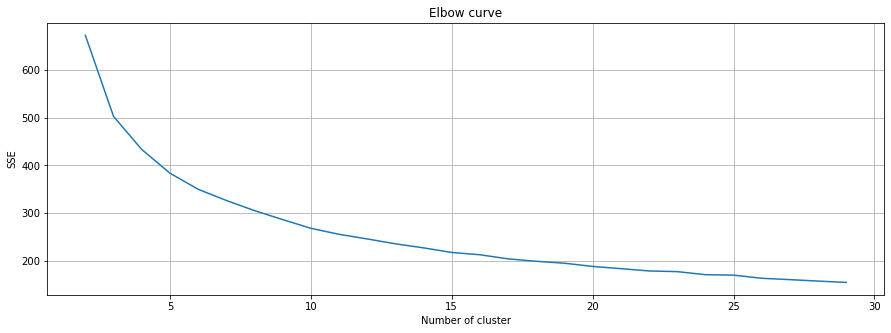

None
Elbow Curve for date:  2020-06-30T00:00:00.000000000


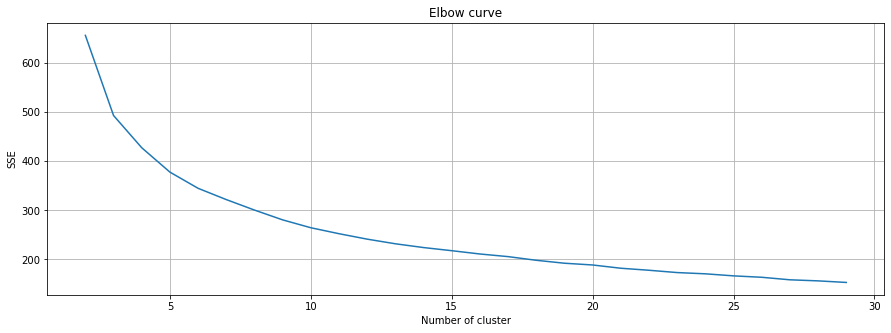

None
Elbow Curve for date:  2020-07-31T00:00:00.000000000


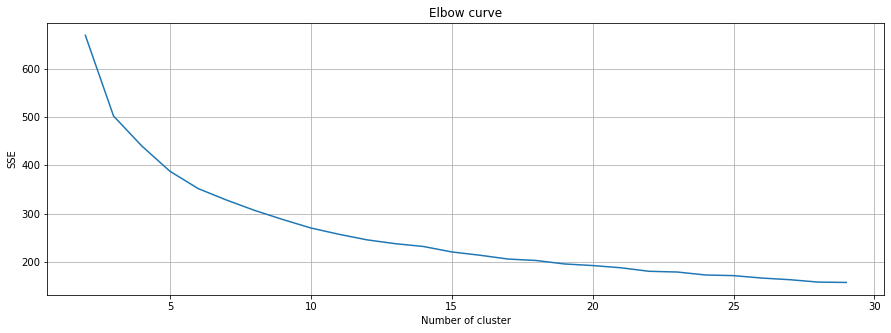

None
Elbow Curve for date:  2020-08-31T00:00:00.000000000


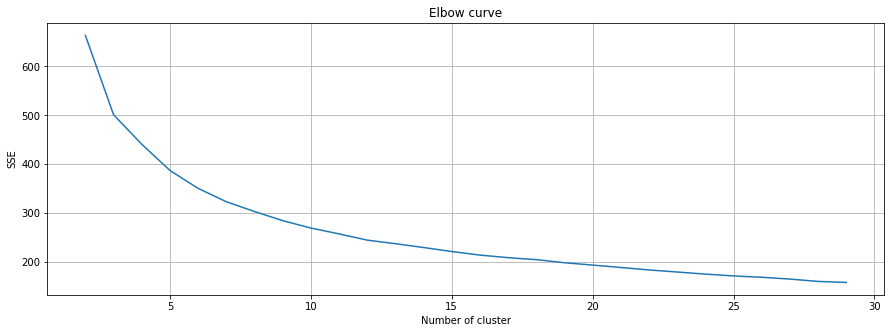

None
Elbow Curve for date:  2020-09-30T00:00:00.000000000


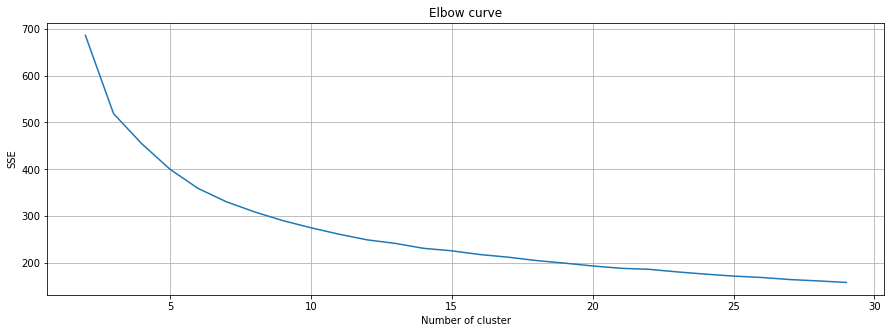

None
Elbow Curve for date:  2020-10-31T00:00:00.000000000


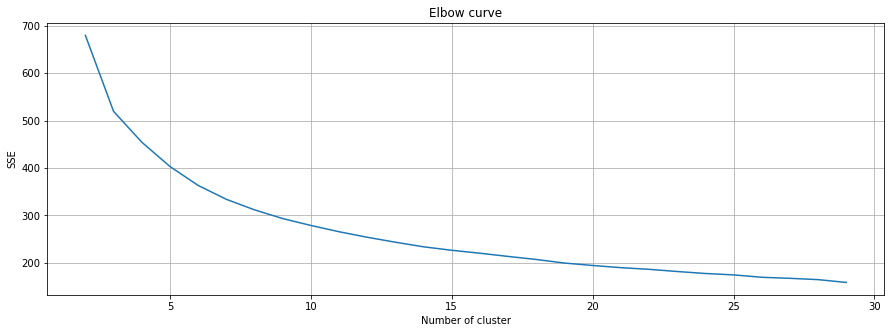

None
Elbow Curve for date:  2020-11-30T00:00:00.000000000


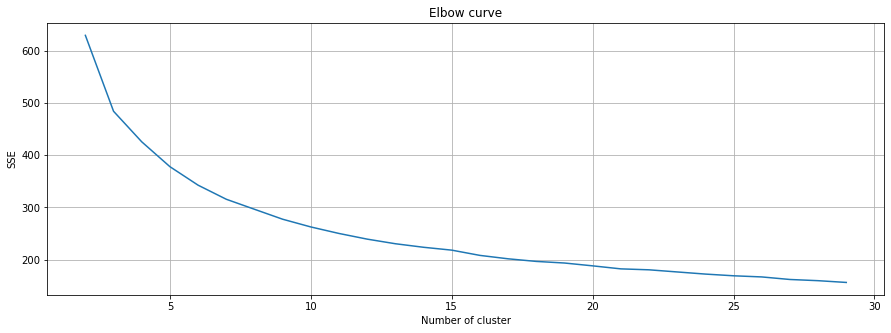

None
Elbow Curve for date:  2020-12-31T00:00:00.000000000


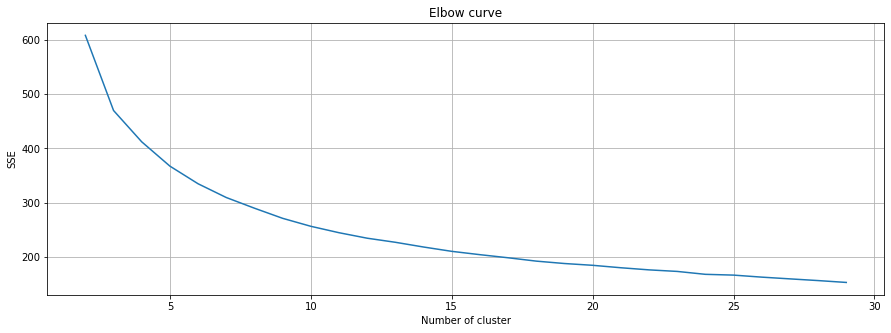

None


In [120]:
for date in date_array:
    print("Elbow Curve for date: ", date)
    print(Elbow_curve(date,'04BBSH-E'))

In [13]:
#df = df.loc[df['report_date']=='2020-02-29']
#df = df.loc[df['report_date']=='2020-01-31']
df = df.loc[df['fund_id']=='04BBSH-E']
df = df.iloc[:13]
#df.set_index(['stock_id'],inplace=True)
df

,fsym_id,fsym_regional_id,fund_id,report_date,is_holding,roe,roa,oper_mgn,pay_out_ratio,pe,pbps,div_yld,stock_id,last_holding,new_changes
152119,T1N9J9-S,RPMZQ3-R,04BBSH-E,2020-02-29,0,0.736257,0.528786,0.895426,0.751899,0.270954,0.389738,0.697859,T1N9J9-S-RPMZQ3-R-04BBSH-E,0.0,0.0
197800,DTMZTR-S,NMTXM7-R,04BBSH-E,2020-02-29,0,0.000000,0.086202,0.118942,0.307280,1.000000,1.000000,0.000000,DTMZTR-S-NMTXM7-R-04BBSH-E,0.0,0.0
116014,R5VL9T-S,KJZM9C-R,04BBSH-E,2020-02-29,0,0.181851,0.277281,0.251268,0.307280,1.000000,1.000000,0.222079,R5VL9T-S-KJZM9C-R-04BBSH-E,0.0,0.0
116055,G18BJK-S,L2LQRT-R,04BBSH-E,2020-02-29,0,0.994465,0.969054,0.910720,0.922097,0.157442,1.000000,0.974442,G18BJK-S-L2LQRT-R-04BBSH-E,0.0,0.0
116041,SVR7X0-S,F0M3M6-R,04BBSH-E,2020-02-29,0,0.374042,0.383676,0.626002,0.307280,0.757425,0.779166,0.222079,SVR7X0-S-F0M3M6-R-04BBSH-E,0.0,0.0
116040,H5Z3XR-S,LXM8H6-R,04BBSH-E,2020-02-29,0,0.997165,0.999615,0.000000,0.307280,0.876382,1.000000,0.000000,H5Z3XR-S-LXM8H6-R-04BBSH-E,0.0,0.0
116039,JRB8S9-S,FCPLRL-R,04BBSH-E,2020-02-29,0,0.687980,0.450327,0.894772,0.307280,0.185572,0.339791,0.222079,JRB8S9-S-FCPLRL-R-04BBSH-E,0.0,0.0
115753,JJXQB6-S,L0XS8N-R,04BBSH-E,2020-02-29,0,0.010234,0.000489,0.000000,0.307280,1.000000,1.000000,0.000000,JJXQB6-S-L0XS8N-R-04BBSH-E,0.0,0.0
116044,SGHNF8-S,NFM6Q0-R,04BBSH-E,2020-02-29,0,0.908765,0.848254,0.471540,0.625462,0.280936,0.586349,0.614114,SGHNF8-S-NFM6Q0-R-04BBSH-E,0.0,0.0
116043,HLWVL6-S,D2RQ56-R,04BBSH-E,2020-02-29,0,0.584675,0.475743,0.891010,0.793967,0.258085,0.254810,0.764620,HLWVL6-S-D2RQ56-R-04BBSH-E,0.0,0.0


In [112]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(df['roe']),np.asarray(df['roa']),np.asarray(df['oper_mgn']),np.asarray(df['pay_out_ratio']),np.asarray(df['pe']),np.asarray(df['pbps']),np.asarray(df['div_yld'])]).T

Text(0.5, 1.0, 'Elbow curve')

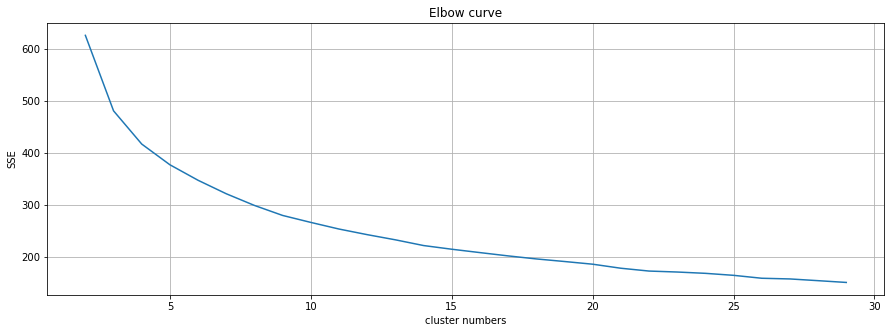

In [113]:
X = data
distorsions = []
for k in range(2, 30):
    k_means = KMeans(n_clusters=k, init='k-means++')
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 30), distorsions)
plt.grid(True)
plt.ylabel('SSE')
plt.xlabel('cluster numbers')
plt.title('Elbow curve')

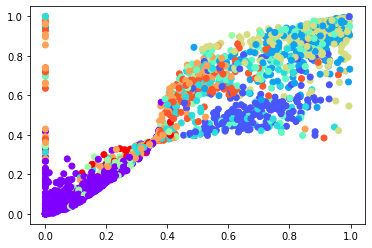

In [114]:
kmeans = KMeans(n_clusters = 10, init='k-means++').fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()

In [115]:
stock = pd.DataFrame(df.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
data = pd.concat([stock, cluster_labels],axis = 1)

In [116]:
data

,stock_id,0
0,T1N9J9-S-RPMZQ3-R-04BBSH-E,1
1,DTMZTR-S-NMTXM7-R-04BBSH-E,0
2,R5VL9T-S-KJZM9C-R-04BBSH-E,0
3,G18BJK-S-L2LQRT-R-04BBSH-E,2
4,SVR7X0-S-F0M3M6-R-04BBSH-E,7
...,...,...
1619,B9572R-S-LM1PBC-R-04BBSH-E,8
1620,B2TSYX-S-VS1SJK-R-04BBSH-E,0
1621,KHYJ27-S-VDP7J2-R-04BBSH-E,4
1622,QQ0TFB-S-GB4QMW-R-04BBSH-E,7
